<a href="https://colab.research.google.com/github/zxc741xb/Obesity_or_CVD_risk/blob/main/Obesity_CVD_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from sklearn import cluster, datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
df = pd.read_csv('/content/drive/MyDrive/dataset/ObesityDataSet.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [32]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [34]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

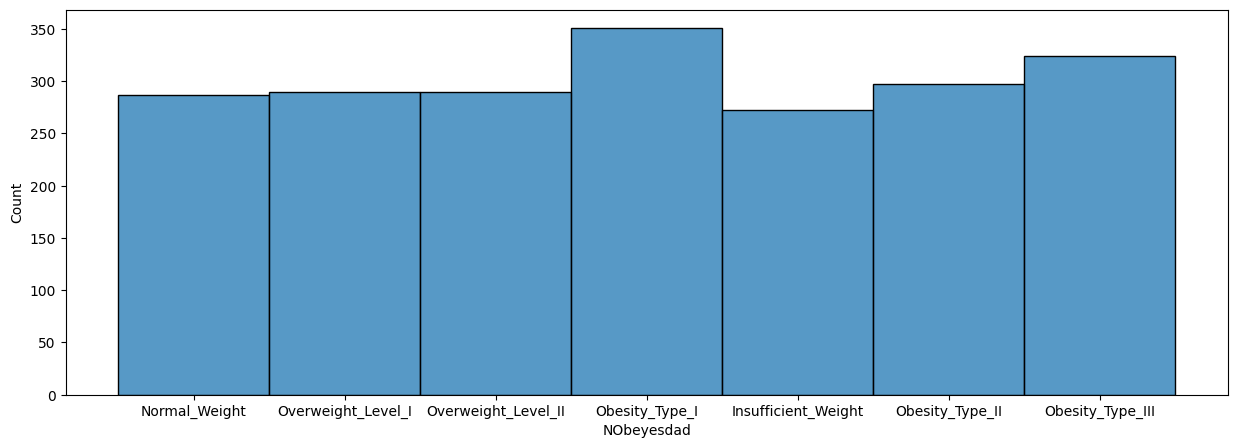

In [35]:
plt.figure(figsize=(15,5))
sns.histplot(df['NObeyesdad'])
plt.show()

<Axes: xlabel='family_history_with_overweight', ylabel='count'>

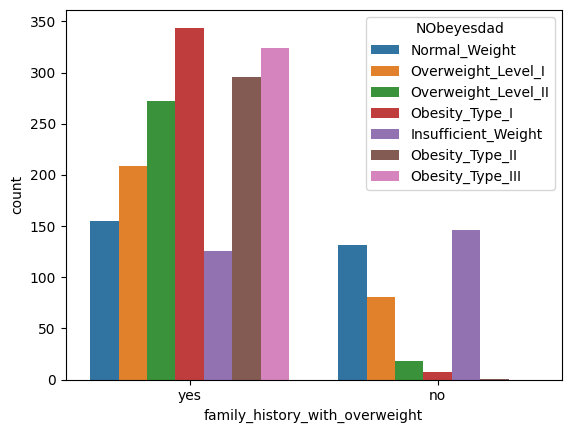

In [36]:
sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=df)

In [37]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

print(df.head())

   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  


In [38]:
corr = df.corr()

<Axes: >

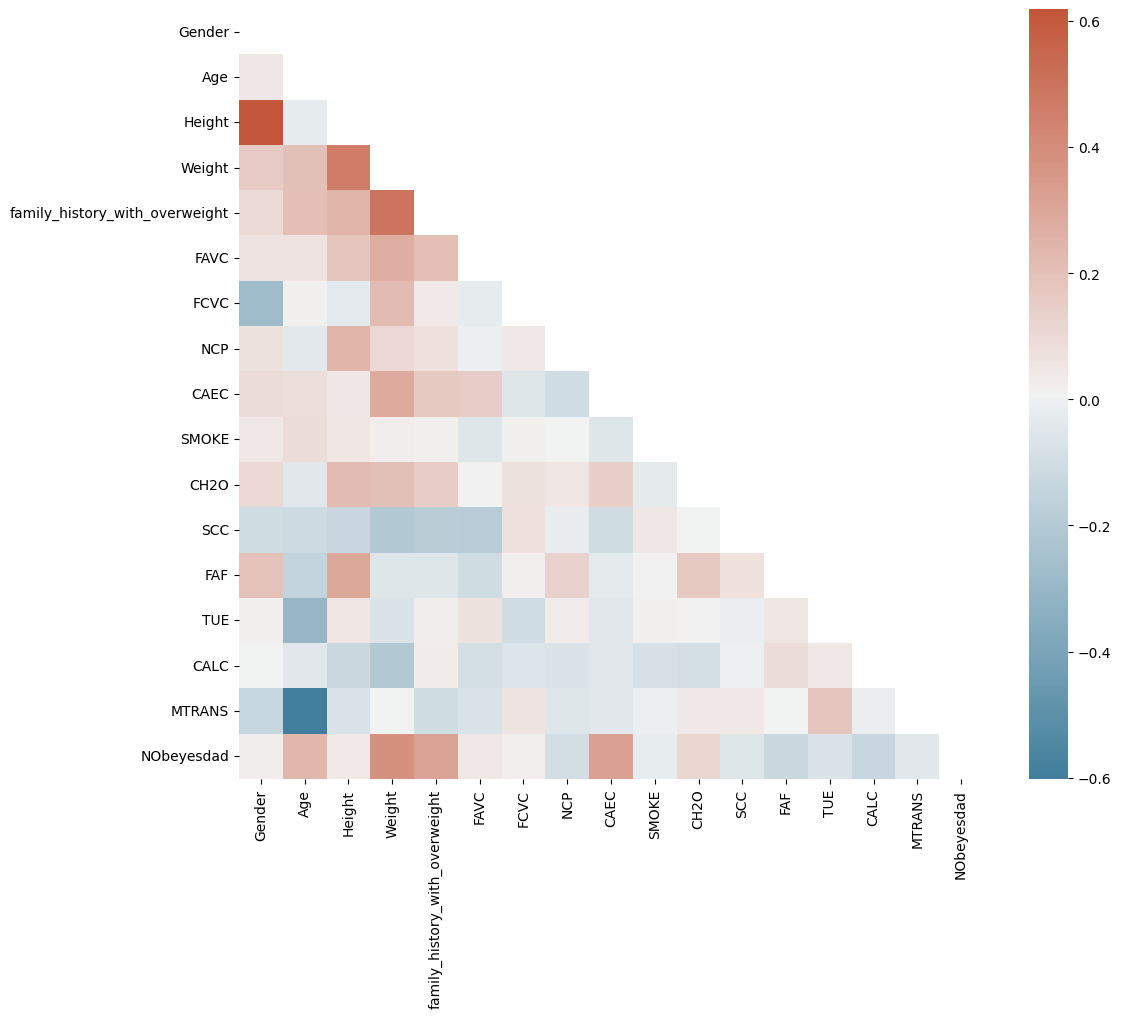

In [45]:
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask = mask, cmap=cmap)

In [51]:
y = df['NObeyesdad']
x = df.drop(['NObeyesdad'], axis=1)

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [54]:
print(x_train.shape)
print(x_test.shape)

(1688, 16)
(423, 16)


# Regression

In [68]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [69]:
y_pred = reg.predict(x_test)

In [70]:
df = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
print(df)

      actual  predicted
1730       3   3.858352
259        2   2.441747
966        5   1.790040
1911       4   3.753637
1815       4   3.781571
...      ...        ...
223        1   1.654212
1755       3   3.521467
1827       4   4.075950
1745       3   3.893280
1638       3   4.080901

[423 rows x 2 columns]


In [71]:
print('reg_train_score = ', reg.score(x_train, y_train).round(3))
print('reg_test_score = ', reg.score(x_test, y_test).round(3))

reg_train_score =  0.28
reg_test_score =  0.302


# RandomForestRegressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor()
RF_reg.fit(x_train, y_train)

RandomForestRegressor()

In [76]:
y_pred = RF_reg.predict(x_test)

In [77]:
df = pd.DataFrame({'actual':y_test, 'predicted':y_pred})
print(df)

      actual  predicted
1730       3       3.00
259        2       3.27
966        5       5.32
1911       4       4.00
1815       4       4.00
...      ...        ...
223        1       2.10
1755       3       2.98
1827       4       4.00
1745       3       3.00
1638       3       2.96

[423 rows x 2 columns]


In [78]:
print('RF_reg_train_score = ', reg.score(x_train, y_train).round(3))
print('RF_reg_test_score = ', reg.score(x_test, y_test).round(3))

RF_reg_train_score =  0.988
RF_reg_test_score =  0.91


<Axes: >

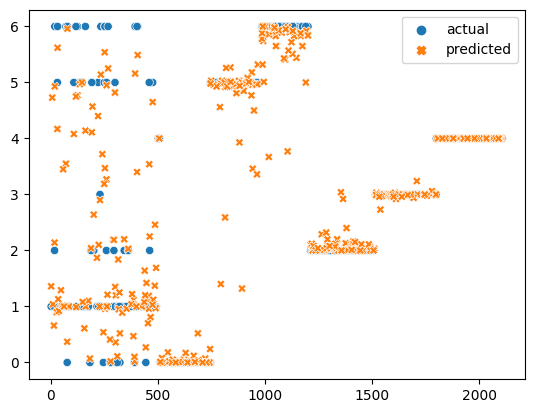

In [80]:
sns.scatterplot(df)

# Random Forest

In [85]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
RF_param = {'n_estimators': [100,150,200,250,300], 'max_depth':[4,5,6,7,8,9]}
RF = ensemble.RandomForestClassifier(random_state=42)
GSCV = GridSearchCV(RF, param_grid=RF_param, cv=5)
GSCV.fit(x_train, y_train)

print('The best model param:', GSCV.best_params_)

The best model param: {'max_depth': 9, 'n_estimators': 250}


In [88]:
RF = ensemble.RandomForestClassifier(n_estimators=250, max_depth=9, random_state=42)
RF.fit(x_train, y_train)

y_pred = RF.predict(x_test)

print('RF_train_score = ', RF.score(x_train, y_train).round(3))
print('RF_test_score = ', RF.score(x_test, y_test).round(3))

RF_train_score =  0.999
RF_test_score =  0.955


# Feature importance

In [90]:
imp = RF.feature_importances_

In [92]:
names = x.columns
names

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

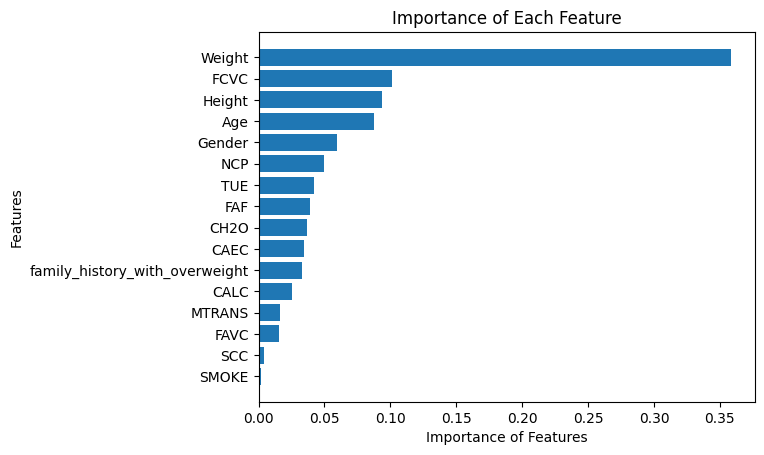

In [93]:
zip(imp,names)
imp, names= zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center')
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of Each Feature')
plt.show()